# Machine Learning with Python

[Based on this Cognitive Class Course](https://cognitiveclass.ai/courses/machine-learning-with-python/)

## Labs

The Labs for the course are located in the `Labs` folder are from CognitiveClass and are licensed under MIT

## Intro to ML

Machine learning is a field of computer science that gives computers the ability to learn without being explicitly progammed

Some popular techniques are:

- *Regression* for predicting continuous values
- *Classification* for predicting a class/category
- *Clustering* for finding structure of data and summarization
- *Associations* for finding items/events that co-occur
- *Anomaly detection* is used for finding abnormal/unusual cases
- *Sequence mining* is for predicting next values
- *Dimension reduction* for reducing the size of data
- *Recommendation systems*

We have a few different buzzwords

- AI
    - Computer Vision
    - Language processing
    - Creativity
- Machine learning
    - Field of AI
    - Experience based
    - Classification
    - Clustering
    - Neural Networks
- Deep Learning
    - Specialized case of ML
    - More automation than most ML

### Python for Machine Learning

Python has many different libraries for machine learning such as

- NumPy
- SciPy
- Matplotlib
- Pandas
- Scikit Learn
 
### Supervised vs Unsupervised

Supervised learning involves us supervising a machine learning model. We do this by teaching the model with a labelled dataset

There are two types of supervised learning, namely Classification and Regression

Unsupervised learning is when the model works on its own to discover information about data using techniques such as Dimension Reduction, Density Estimation, Market Basket Analysis, and Clustering


- Supervised
    - Classification
    - Regression
    - More evaluation methods
    - Controlled environment
- Unsupervised
     - Clustering
     - Fewer evaluation methods
     - Less controlled environment
 

## Regression

Regression makes use of two different variables

- Dependent - Predictors $X$
- Independent - Target $Y$

With Regression our $X$ values need to be continuous, but the $Y$ values can be either continuous, discrete, or categorical

There are two types of regression:

- Simple Regression
    - Simple Linear Regression
    - Simple Non-Linear Regression
    - Single $X$
- Multiple Regression
    - Multiple Linear Regression
    - Multiple Non-Linear Regression
    - Multiple $X$

Regression is used when we have continuous data and is well suited to predicting  continuous data

There are many regression algorithms such as

- Ordinal regression
- Poisson regression
- Fast forest quartile regression
- Linear, polynomial, lasso, stepwise, and ridge regression
- Bayesian linear regression
- Neural network regression
- Decision forest regression
- Boosted decision tree regression
- K nearest neighbors (KNN)

Each of which are better suited to some circumstances than to others

### Simple Linear Regression

In SLR we have two variables, one dependent, and one independent. The target variable ($y$) can be either be continuous or categorical, but the predictor ($x$) must be continuous

To get a better idea of whether SLR is appropriate we can simply do a plot of $x$ vs $y$ and find the line which will be the best fit for the data

The line is represented by the following equation

$$
y=\theta_0+\theta_1x_1
$$

The aim of SLE is to adjust the $\theta$ values to minimize the residual error in our data and find the best fit

$$
MSE=\frac{1}{n}\Sigma_{i=1}^n(y_i-\hat y_i)^2
$$

#### Estimating Parameters

We have two options to estimate our parameters, given an SLR problem

Estimate $\theta_0$ and $\theta_1$ using the following equations

$$
\theta_1 = \frac{\Sigma_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\Sigma_{i=1}^n(x_i-\bar x)^2}
$$

$$
\theta_0=\bar y-\theta_1\bar x
$$

We can use these values to make predictions with the equation

$$
\hat y=\theta_0+\theta_1x_1
$$

#### Pros

- Fast
- Easy to Understand
- No tuning needed

#### Lab
##### Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

##### Import Data

In [2]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


##### Data Exploration

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


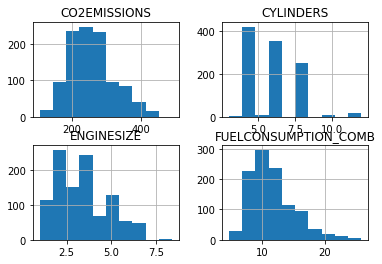

In [5]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

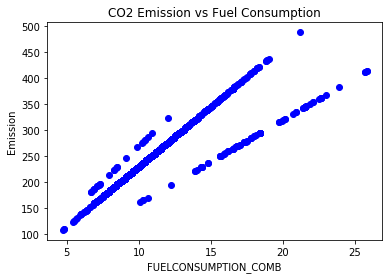

In [6]:
plt.title('CO2 Emission vs Fuel Consumption')
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

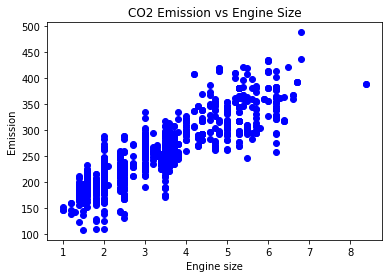

In [7]:
plt.title('CO2 Emission vs Engine Size')
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

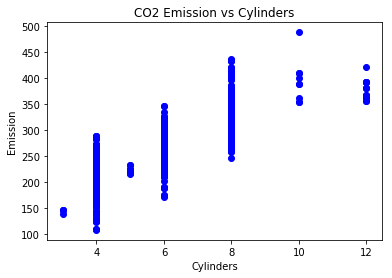

In [8]:
plt.title('CO2 Emission vs Cylinders')
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

##### Test-Train Split

We need to split our data into a test set and a train set

In [9]:
tt_mask = np.random.rand(len(df)) < 0.8
train = cdf[tt_mask].reset_index()
test = cdf[~tt_mask].reset_index()

##### Simple Regression Model

We can look at the distribution of the Engine Size in our training and test set respectively as follows

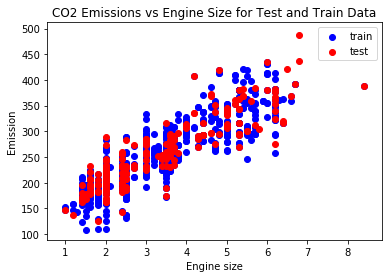

In [10]:
plt.title('CO2 Emissions vs Engine Size for Test and Train Data')
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,color='blue',label='train')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,color='red',label='test')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.legend()
plt.show()

##### Modeling

In [11]:
from sklearn import linear_model

In [12]:
lin_reg = linear_model.LinearRegression()
train_x = train[['ENGINESIZE']]
train_y = train[['CO2EMISSIONS']]

test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]

In [13]:
lin_reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
'Coefficients: ' + str(lin_reg.coef_) + ' Intercept: ' + str(lin_reg.intercept_)

'Coefficients: [[ 39.18797679]] Intercept: [ 124.51546375]'

We can plot the line on our data to see the fit

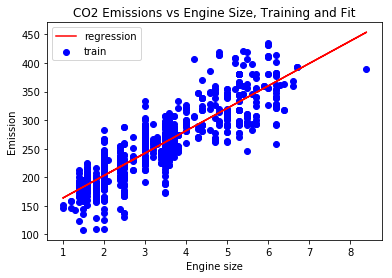

In [15]:
plt.title('CO2 Emissions vs Engine Size, Training and Fit')
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,color='blue',label='train')
plt.plot(train_x, lin_reg.coef_[0,0]*train_x + lin_reg.intercept_[0],color='red',label='regression')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.legend()
plt.show()

##### Model Evaluation

###### Import Packages

In [16]:
from sklearn.metrics import r2_score

###### Predict the CO2 Emissions

In [17]:
predicted_y = lin_reg.predict(test_x)

###### Display Results

In [18]:
results = pd.DataFrame()

results[['ENGINESIZE']] = test_x
results[['ACTUALCO2']] = test_y
results[['PREDICTEDCO2']] = pd.DataFrame(predicted_y)
results[['ERROR']] = pd.DataFrame(np.abs(predicted_y - test_y))
results[['SQUAREDERROR']] = pd.DataFrame((predicted_y - test_y)**2)

results.head()

,ENGINESIZE,ACTUALCO2,PREDICTEDCO2,ERROR,SQUAREDERROR
0,3.5,232,261.673383,29.673383,880.509629
1,4.7,338,308.698955,29.301045,858.551259
2,2.0,202,202.891417,0.891417,0.794625
3,2.0,230,202.891417,27.108583,734.875255
4,2.0,230,202.891417,27.108583,734.875255


###### Model Evaluation

In [19]:
MAE = np.mean(results[['ERROR']])
MSE = np.mean(results[['SQUAREDERROR']])
R2  = r2_score(test_y, predicted_y)

print("Mean absolute error: %.2f" % MAE)
print("Residual sum of squares (MSE): %.2f" % MSE)
print("R2-score: %.2f" % R2)

Mean absolute error: 24.45
Residual sum of squares (MSE): 1040.34
R2-score: 0.78


### Multiple Linear Regression

In reality multiple independent variables will define a specific target. MLR is simply an extension on the SLR Model

MLR is useful for solving problems such as

- Define the impact of independent variables on effectiveness of prediction
- Predicting the impact of change in a specific variable

MLR makes use of multiple predictors to predict the target value, and is generally of the form


$$
\hat y=\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + ... + \theta_nx_n
$$

$$
\hat y=\theta^TX
$$

$\theta$ is a vector of coefficients which are multiplied by $x$, these are called the parameters or weight vectors, and $x$ is the feature set, the idea with MLR is to predict the best-fit hyperplane for our data

#### Estimating Parameters

We have a few ways to estimate the best parameters, such as

- Ordinary Least Squares
    - Linear algebra
    - Not suited to large datasets
- Gradient Descent
    - Good for large datasets
- Other methods are available to do this as well

#### How Many Variables?

Making use of more variables will generally increase the accuracy of the model, howevre using too many variables without good justification can lead to us overfitting the model

We can make use of categorical variables if we convert them to numerric values

MLR assumes that we have a linear relationship between the dependent and independent variables

### Model Evaluation

We have to perform regression evaluation when building a model

#### Train/Test Joint

We make use of our data to train our model, and then compare the predicted values to the actual values of our model

The error of the model is the average of the actual and predicted values for the model

This approach has a high training accuracy, but a lower out-of-sample accuracy

Aiming for a very high training accuracy can lead to overfitting to the training data resulting in poor out-of-sample data

#### Train/Test Split

We split our data into a portion for testing and a portion for training, these two sets are mutually exclusive and allow us to get a good idea of what our out-of-sample accuracy will be

Generally we would train our data with the testing data afterwards in order to increase our accuracy

##### K-Fold Cross-Validation

This makes use of us splitting the dataset into different pieces, and using every combination of test/train datasets in order to get a more aggregated fit

#### Evaluation Metrics

Evaluation metrics are used to evaluate the performance of a model, metrics provide insight into areas of the model that require attention

##### Errors

In the context of regression, error is the difference between the data points and the valuedetermined by the model

Some of the main error equations are defined below


$$
MAE=\frac{1}{n}\Sigma_{i=1}^n|y_i-\hat y_i|
$$


$$
MSE=\frac{1}{n}\Sigma_{i=1}^n(y_i-\hat y_i)^2
$$


$$
RMSE=\sqrt{\frac{1}{n}\Sigma_{i=1}^n(y_i-\hat y_i)^2}
$$

$$
RAE=\frac{\Sigma_{i=1}^n|y_i-\hat y_i|}{\Sigma_{i=1}^n|y_i-\bar y_i|}
$$

$$
RSE=\frac{\Sigma_{i=1}^n(y_i-\hat y_i)^2}{\Sigma_{i=1}^n(y_i-\bar y_i)^2}
$$

##### Fit

$R^2$ helps us see how closely our data is represented by a specific regression line, and is defined as

$$
R^2=1-RSE
$$

Or

$$
R^2=1-\frac{\Sigma_{i=1}^n(y_i-\hat y_i)^2}{\Sigma_{i=1}^n(y_i-\bar y_i)^2}
$$

A higher $R^2$ represents a better fit

### Non-Linear Regression

Not all data can be predicted using a linear regression line, we have many diferent regression lines to fit more complex data

#### Polynomial Regression

Polynomial Regression is a method with which we can fit a polynomial to our data, it is still possible for us to define a polynomial regression by transforming it into a multi-variable linear regression problem as follows

Given the polynomial

$$
\hat y=\theta_0+\theta_1x+\theta_2x^2+\theta_3x^3
$$

We can create new variables which represent the different powers of our initial variable

$$
x_1=x
$$

$$
x_2=x^2
$$

$$
x_3=x^3
$$

Therefore resulting in the following linear equation

$$
\hat y=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_3
$$

#### Other Non-Linear Regression

Non-Linear Regression can be of many forms as well, including any other mathematical relationships that we can define

For more complex NLR problems it can be difficult to evaluate the parameters for the equation

#### Lab

There are many different model types and equations shown in the Lab Notebook aside from what I have here

##### Import the Data

Using China's GDP data

In [20]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [21]:
x_data, y_data = (df[['Year']], df[['Value']])

##### Plotting the Data

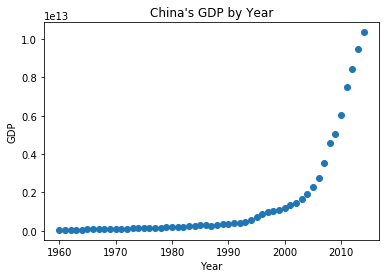

In [22]:
plt.title('China\'s GDP by Year')
plt.plot(x_data, y_data, 'o')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

##### Defining a Fit

Next we can try to approximate a curve that we think will fit the data we have, we can use a sigmoid, as defined below

$$
\hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}
$$

$\beta_1$ : Controls the curve's steepness,

$\beta_2$ : Slides the curve on the x-axis.

In [23]:
def sigmoid(x, b_1, b_2):
     y = 1 / (1 + np.exp(-b_1*(x-b_2)))
     return y

The above function can be seen to be

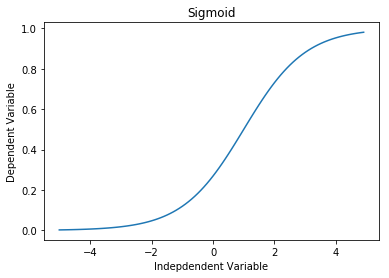

In [24]:
X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X, 1, 1)

plt.title('Sigmoid')
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Next let's try to fit this to the data with some example values

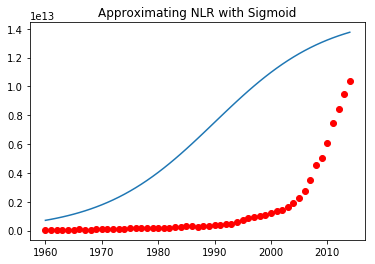

In [25]:
b_1 = 0.10
b_2 = 1990.0

#logistic function
y_pred = sigmoid(x_data, b_1 , b_2)

#plot initial prediction against datapoints
plt.title('Approximating NLR with Sigmoid')
plt.plot(x_data, y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')
plt.show()

##### Data Normalization

Let's normalize our data so that we don't need to multiply by crazy numbers as before

In [26]:
# for some reason this seems to be the only way the conversion
# from a dataframe works as desired
# the normalization from the labs are as such:
# xdata =x_data/max(x_data)
# ydata =y_data/max(y_data)
x_norm = (np.array(x_data)/max(np.array(x_data))).transpose()[0]
y_norm = (np.array(y_data)/max(np.array(y_data))).transpose()[0]

##### Finding the Best Fit

Next we can import `curve_fit` to help us fit the the curve to our data

In [27]:
from scipy.optimize import curve_fit

In [28]:
popt, pcov = curve_fit(sigmoid, x_norm, y_norm)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))
print(popt)
print(pcov)

 beta_1 = 690.453017, beta_2 = 0.997207
[ 690.45301712    0.99720713]
[[  1.52273887e+03  -2.88115957e-04]
 [ -2.88115957e-04   7.25956452e-09]]


And we can plot the result as follows

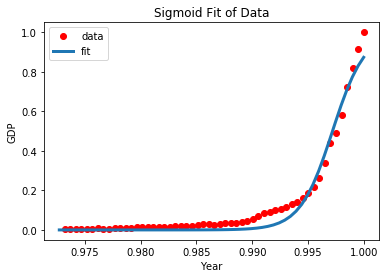

In [29]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
y = sigmoid(x, *popt)


plt.title('Sigmoid Fit of Data')
plt.plot(x_norm, y_norm, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend()
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

##### Model Accuracy

In [30]:
from sklearn.metrics import r2_score

# split data into train/test
mask = np.random.rand(len(df)) < 0.8
train_x = x_norm[mask]
test_x = x_norm[~mask]
train_y = y_norm[mask]
test_y = y_norm[~mask]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.95
